In [1]:
!pip install diffusers transformers scipy ftfy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.6 MB/s eta 0:00:00


In [1]:
import torch
from PIL import Image
from torchvision import transforms
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline

In [11]:
# Load the Stable Diffusion model
# Updated to use StableDiffusionPipeline for text-to-image generation
pipe = StableDiffusionPipeline.from_pretrained("hakurei/waifu-diffusion", torch_dtype=torch.float16)
pipe = pipe.to("cuda")
img2img_pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
            "hakurei/waifu-diffusion",
            torch_dtype=torch.float16,
        )
img2img_pipe = img2img_pipe.to("cuda")

# Define a function to generate an image
def generate_image(prompt, image=None):
    if image is None:
        # Generate an image from the prompt
        image = pipe(prompt).images[0] # Updated call to pipe
    else:
        # Generate an image from the prompt and the previous image using img2img pipeline
        image = img2img_pipe(prompt, image=image).images[0] # Updated call to pipe for img2img
    return image

# Set the device to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/620 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.89k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/819 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

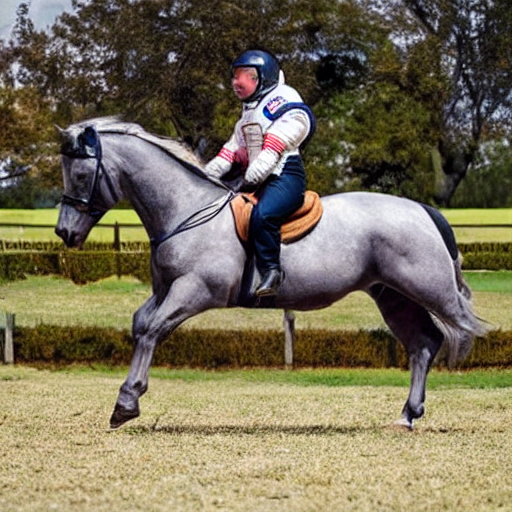

In [7]:
#CompVis/stable-diffusion-v1-4
generate_image("a photograph of an astronaut riding a horse")

  0%|          | 0/50 [00:00<?, ?it/s]

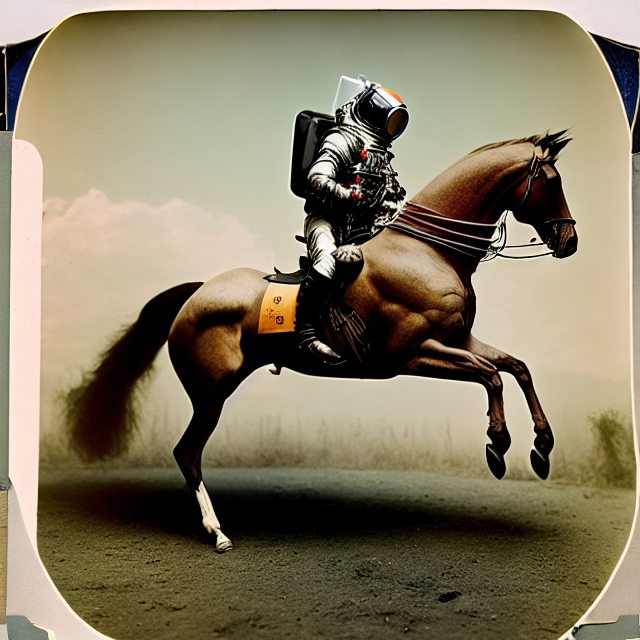

In [10]:
#dreamlike-art/dreamlike-diffusion-1.0
generate_image("a photograph of an astronaut riding a horse")

  0%|          | 0/50 [00:00<?, ?it/s]

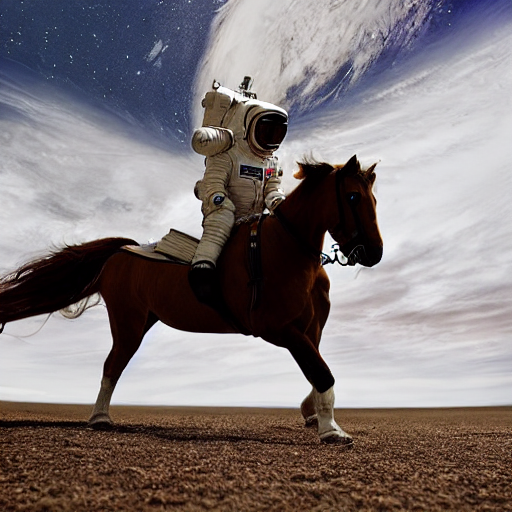

In [4]:
#prompthero/openjourney-v4
generate_image("a photograph of an astronaut riding a horse")

  0%|          | 0/50 [00:00<?, ?it/s]

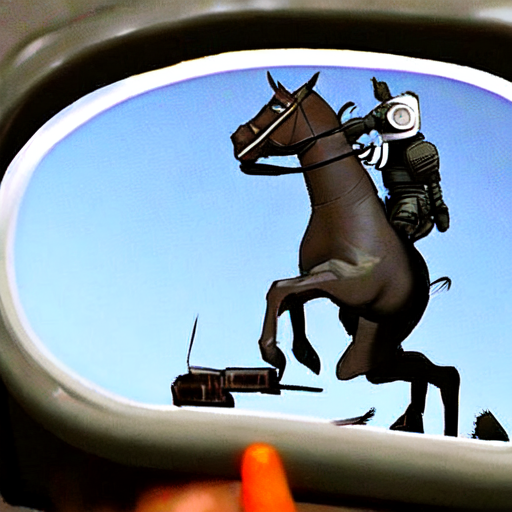

In [12]:
#hakurei/waifu-diffusion
generate_image("a photograph of an astronaut riding a horse")

Openjourney gave the fastest and most beautiful image

###Reducing inference steps and included an optional parameter to lower the resolution.

In [14]:
pipe = StableDiffusionPipeline.from_pretrained(
    "prompthero/openjourney-v4",
    torch_dtype=torch.float16
)
pipe = pipe.to(device)
img2img_pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "prompthero/openjourney-v4",
    torch_dtype=torch.float16
)
img2img_pipe = img2img_pipe.to(device)
def generate_image(prompt, image=None, num_inference_steps=30, height=512, width=512):
    if image is None:
        image = pipe(prompt, num_inference_steps=num_inference_steps, height=height, width=width).images[0]
    else:
        image = img2img_pipe(prompt, image=image, num_inference_steps=num_inference_steps, height=height, width=width).images[0]
    return image


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

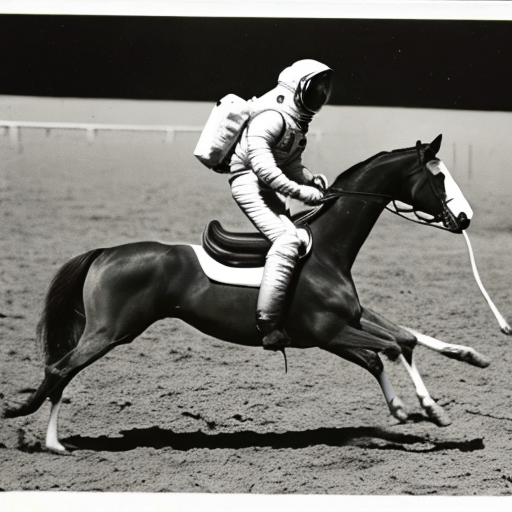

In [16]:
generate_image("a photograph of an astronaut riding a horse")

Time is reduced from 6 sec to 4 sec